In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv(r"C:\Users\jayes\OneDrive\Desktop\python_MI\ML_assignment\insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3.0,no,northwest,10600.54830
1334,18.0,female,31.920,0.0,no,northeast,2205.98080
1335,18.0,female,36.850,0.0,no,southeast,1629.83350
1336,21.0,female,25.800,0.0,no,southwest,2007.94500


In [3]:
mean = dataset.mean(numeric_only = True)
print(mean)
mode = dataset.mode(numeric_only = True)
print(mode)

age            39.214232
bmi            30.665390
children        1.094382
charges     13270.422265
dtype: float64
    age   bmi  children    charges
0  18.0  32.3       0.0  1639.5631


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1335.000000,1334.000000,1335.000000,1338.000000
mean,39.214232,30.665390,1.094382,13270.422265
std,14.051488,6.098268,1.206587,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


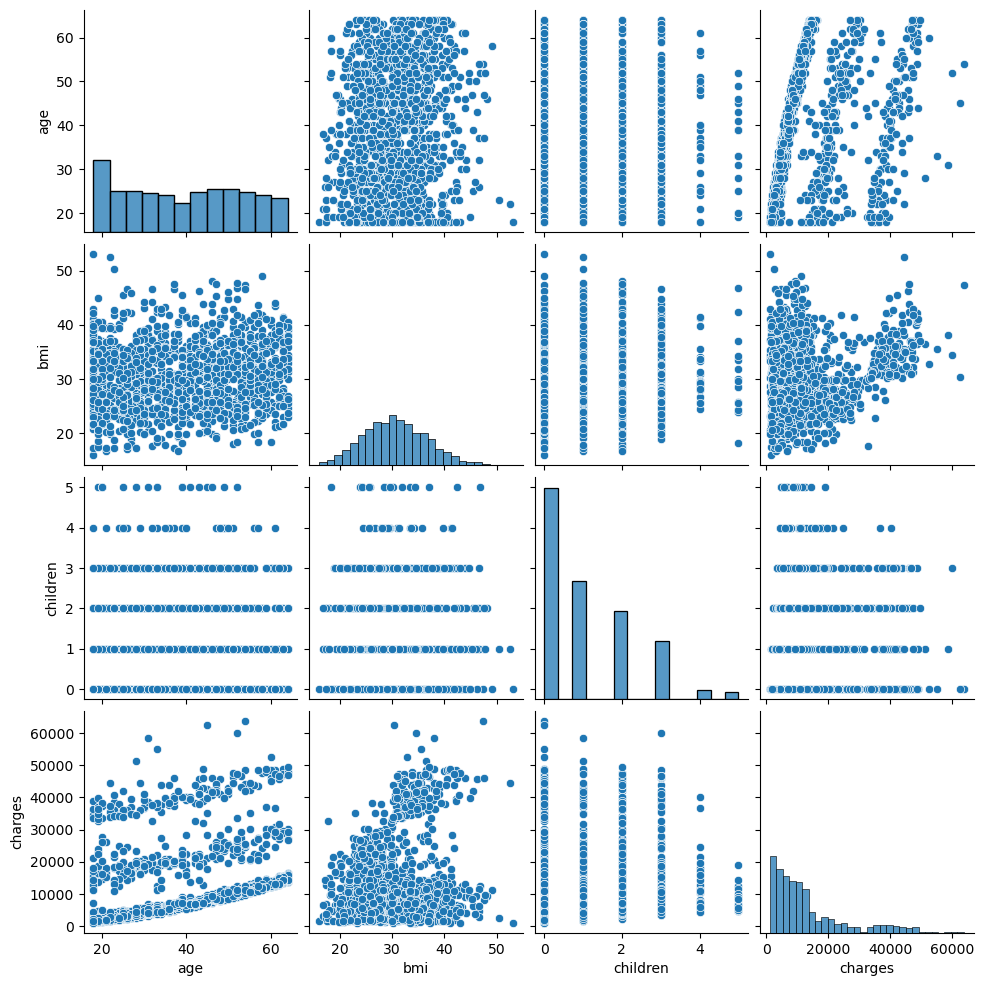

In [6]:
sns.pairplot(dataset)

In [7]:
dataset.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
dataset.isnull().sum()

age         3
sex         0
bmi         4
children    3
smoker      0
region      0
charges     0
dtype: int64

In [9]:
dataset['children'].fillna(dataset['children'].mode().iloc[0] , inplace = True)
dataset['age'].fillna(dataset['age'].mode().iloc[0] , inplace = True)
dataset['bmi'].fillna(dataset['bmi'].mode().iloc[0] , inplace = True)


C:\Users\jayes\AppData\Local\Temp\ipykernel_44492\2588316391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['children'].fillna(dataset['children'].mode().iloc[0] , inplace = True)
C:\Users\jayes\AppData\Local\Temp\ipykernel_44492\2588316391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [12]:
dataset['sex']=le.fit_transform(dataset['sex'])
dataset['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [13]:
dataset['smoker']=le.fit_transform(dataset['smoker'])
dataset['region']=le.fit_transform(dataset['region'])

In [14]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1,10600.54830
1334,18.0,0,31.920,0.0,0,0,2205.98080
1335,18.0,0,36.850,0.0,0,2,1629.83350
1336,21.0,0,25.800,0.0,0,3,2007.94500


In [15]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
feature=dataset[['age']]
target=dataset[['charges']]

In [18]:
feature

,age
0,19.0
1,18.0
2,28.0
3,33.0
4,32.0
...,...
1333,50.0
1334,18.0
1335,18.0
1336,21.0


In [19]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [22]:
from sklearn.model_selection  import  train_test_split
feature_train ,feature_test , target_train , target_test = train_test_split(
    feature ,
    target,
    test_size=0.25,  
)

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()
lr


LinearRegression()

In [27]:
model=lr.fit(feature_train,target_train)
model

LinearRegression()

In [29]:
y_preds=model.predict(feature_test)
y_preds

array([[17866.73937034],
       [11746.9274657 ],
       [15663.60708467],
       [16887.56946559],
       [15663.60708467],
       [ 8075.04032291],
       [15418.81460848],
       [19335.49422745],
       [10767.75756096],
       [ 9788.58765621],
       [10278.17260858],
       [19335.49422745],
       [ 8075.04032291],
       [15418.81460848],
       [15663.60708467],
       [ 8564.62527529],
       [ 8319.8327991 ],
       [ 8075.04032291],
       [10033.3801324 ],
       [16397.98451322],
       [17866.73937034],
       [ 9299.00270384],
       [13950.05975137],
       [11746.9274657 ],
       [19335.49422745],
       [ 8319.8327991 ],
       [14194.85222755],
       [10767.75756096],
       [11502.13498951],
       [ 8075.04032291],
       [18356.32432271],
       [15174.02213229],
       [18601.11679889],
       [ 8319.8327991 ],
       [ 8564.62527529],
       [13950.05975137],
       [12726.09737044],
       [17377.15441796],
       [11502.13498951],
       [10033.3801324 ],


In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
mae=mean_absolute_error(target_test,y_preds)
mae

9230.69482897088

In [32]:
mse=mean_squared_error(target_test,y_preds)
mse

136642460.27649894

In [33]:
r2=r2_score(target_test,y_preds)
r2

0.10928526900683233

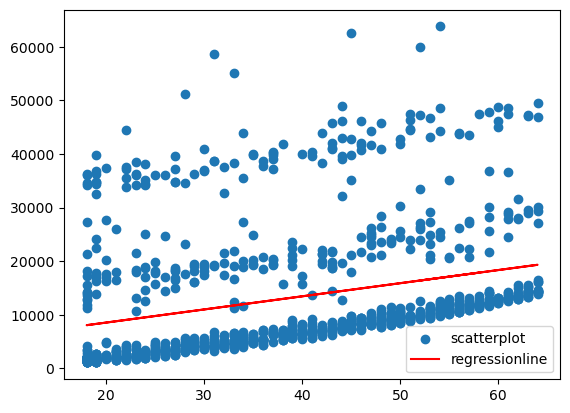

In [36]:
plt.scatter(feature_train,target_train,label='scatterplot')
plt.plot(feature_test,y_preds,label='regressionline',color='red')
plt.legend()
plt.show()

In [37]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0,27.900,0.0,1,3,16884.92400
1,18.0,1,33.770,1.0,0,2,1725.55230
2,28.0,1,33.000,3.0,0,2,4449.46200
3,33.0,1,22.705,0.0,0,1,21984.47061
4,32.0,1,28.880,0.0,0,1,3866.85520


In [43]:
features=dataset[['age','sex','bmi','children','smoker'	,'region']]
target=dataset[['charges']]

In [44]:
features

,age,sex,bmi,children,smoker,region
0,19.0,0,27.900,0.0,1,3
1,18.0,1,33.770,1.0,0,2
2,28.0,1,33.000,3.0,0,2
3,33.0,1,22.705,0.0,0,1
4,32.0,1,28.880,0.0,0,1
...,...,...,...,...,...,...
1333,50.0,1,30.970,3.0,0,1
1334,18.0,0,31.920,0.0,0,0
1335,18.0,0,36.850,0.0,0,2
1336,21.0,0,25.800,0.0,0,3


In [45]:
target

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [47]:
features_train ,features_test ,target_train , target_test = train_test_split(
    features,
    target,
    test_size=0.25,  
)

In [50]:
lr=LinearRegression()
lr

LinearRegression()

In [52]:
model=lr.fit(features_train,target_train)
model

LinearRegression()

In [54]:
y_preds=model.predict(features_test)
y_preds

array([[14622.71252341],
       [37921.5978271 ],
       [ 1753.99621253],
       [ 9017.23642903],
       [ 5012.45980994],
       [ 8231.06539079],
       [27367.55252466],
       [ 7203.46462817],
       [30703.75443707],
       [-1921.3545839 ],
       [11278.52933733],
       [ 9345.19218819],
       [ 7624.20339589],
       [32781.1205956 ],
       [ 5126.59161882],
       [25998.31518127],
       [ 7691.73560958],
       [ 8080.79812635],
       [35764.96866535],
       [ 3086.73726077],
       [10128.03814271],
       [ 3860.42184951],
       [15995.5528855 ],
       [ 8950.79001308],
       [ 4071.77886544],
       [ 5016.33129823],
       [ 7114.95260967],
       [ 6982.6679605 ],
       [10465.52366415],
       [ 9119.86128713],
       [11448.15549961],
       [27947.39807427],
       [24836.85025983],
       [ 2791.75036791],
       [ 9343.48572873],
       [13592.32920967],
       [ 6955.33491639],
       [33704.50329643],
       [ 9627.27652797],
       [ 8728.53702523],


In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
